# Exploratory Data Analysis on Suicides cases in India

##### Importing Libraries

 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.palplot(sns.color_palette("Paired"))
import matplotlib
matplotlib.use('nbagg')



##### Load the dataset 

In [2]:
#Loading the dataset
df = pd.read_csv("Suicides_in_India.csv")


In [3]:
df.head(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29,0
1,A & N ISLANDS,2001,Causes,Divorce,Male,60+,0
2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+,0
3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+,0
4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14,0
5,A & N ISLANDS,2001,Causes,Paralysis,Male,45-59,0
6,A & N ISLANDS,2001,Causes,Property Dispute,Male,0-14,0
7,A & N ISLANDS,2001,Causes,Suspected/Illicit Relation,Female,15-29,0
8,A & N ISLANDS,2001,Means_adopted,By Consuming Insecticides,Female,0-14,0
9,A & N ISLANDS,2001,Means_adopted,By Fire/Self Immolation,Female,30-44,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
State        237519 non-null object
Year         237519 non-null int64
Type_code    237519 non-null object
Type         237519 non-null object
Gender       237519 non-null object
Age_group    237519 non-null object
Total        237519 non-null int64
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [5]:
df.tail(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
237509,WEST BENGAL,2012,Causes,Insanity/Mental Illness,Male,0-14,0
237510,WEST BENGAL,2012,Means_adopted,By coming under running vehicles/trains,Male,0-14,1
237511,WEST BENGAL,2012,Means_adopted,By touching electric wires,Female,0-14,0
237512,WEST BENGAL,2012,Means_adopted,By touching electric wires,Male,45-59,0
237513,WEST BENGAL,2012,Professional_Profile,Professional Activity,Male,15-29,0
237514,WEST BENGAL,2012,Professional_Profile,Professional Activity,Male,60+,0
237515,WEST BENGAL,2012,Professional_Profile,Self-employed (Business activity),Male,0-14,0
237516,WEST BENGAL,2012,Professional_Profile,Service (Government),Male,15-29,0
237517,WEST BENGAL,2012,Professional_Profile,Service (Government),Male,60+,0
237518,WEST BENGAL,2012,Social_Status,Never Married,Male,0-100+,2658


In [6]:
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


##### Checking missing values

In [7]:
df.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

### Data Cleaning
##### Before performing EDA on the dataset,data cleaning is important step which involves renmaing some of the entries and dropping some of the rows.

###### Assuming the column Total indicates number of suicides , the zero (0) valued rows do not offer any sense in the data set. Hence decided to truncate the data set by removing these rows.
###### Also decided to remove age group 0-100+ as this not clear for my understanding.

In [8]:
df.drop(df.loc[df['Age_group']=='0-100+'].index, inplace=True)
df = df[df['Total'] != 0]

In [9]:
#After cleaning, checking the dimensions of the dataset
print ( "Number of rows are", df.shape[0])
print ( "Number of columns are", df.shape[1])

Number of rows are 92159
Number of columns are 7


the total no of cases from 2001-2012:
 Year
2001    325428
2002    331146
2003    332516
2004    340955
2005    341717
2006    354319
2007    367845
2008    374980
2009    381127
2010    403728
2011    405989
2012    376398
Name: Total, dtype: int64


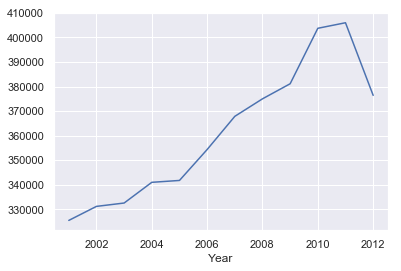

In [10]:
# column Total is number of suicides . 
# Yearwise sucides. 
print('the total no of cases from 2001-2012:\n', df.groupby('Year')['Total'].sum())
df.groupby("Year")["Total"].sum().plot(kind="line")

In [11]:
print("From Year 2001 to 2011 sucides rate is increased by", round((df.groupby('Year')['Total'].sum().max() - df.groupby('Year')['Total'].sum().min())/df.groupby('Year')['Total'].sum().min()*100, 2) )

From Year 2001 to 2011 sucides rate is increased by 24.76


In [12]:
#Calculatin state wise cases
df['State'].value_counts()

ANDHRA PRADESH       4873
KARNATAKA            4803
TAMIL NADU           4742
MADHYA PRADESH       4717
MAHARASHTRA          4646
UTTAR PRADESH        4642
GUJARAT              4546
WEST BENGAL          4284
KERALA               4197
CHHATTISGARH         4062
RAJASTHAN            4012
ODISHA               3867
ASSAM                3569
HARYANA              3519
DELHI (UT)           3023
JHARKHAND            2913
BIHAR                2826
PUNJAB               2668
HIMACHAL PRADESH     2361
TRIPURA              2208
UTTARAKHAND          2154
GOA                  1985
JAMMU & KASHMIR      1895
PUDUCHERRY           1881
SIKKIM               1183
A & N ISLANDS        1114
MEGHALAYA             973
CHANDIGARH            895
ARUNACHAL PRADESH     880
D & N HAVELI          775
MIZORAM               607
MANIPUR               452
NAGALAND              443
DAMAN & DIU           416
LAKSHADWEEP            28
Name: State, dtype: int64

In [13]:
# Removing unwanted total overall states count
df = df[(df["State"]!="Total (States)")&(df["State"]!="Total (Uts)")&
(df["State"]!="Total (All India)") ]
df['State'].value_counts()

ANDHRA PRADESH       4873
KARNATAKA            4803
TAMIL NADU           4742
MADHYA PRADESH       4717
MAHARASHTRA          4646
UTTAR PRADESH        4642
GUJARAT              4546
WEST BENGAL          4284
KERALA               4197
CHHATTISGARH         4062
RAJASTHAN            4012
ODISHA               3867
ASSAM                3569
HARYANA              3519
DELHI (UT)           3023
JHARKHAND            2913
BIHAR                2826
PUNJAB               2668
HIMACHAL PRADESH     2361
TRIPURA              2208
UTTARAKHAND          2154
GOA                  1985
JAMMU & KASHMIR      1895
PUDUCHERRY           1881
SIKKIM               1183
A & N ISLANDS        1114
MEGHALAYA             973
CHANDIGARH            895
ARUNACHAL PRADESH     880
D & N HAVELI          775
MIZORAM               607
MANIPUR               452
NAGALAND              443
DAMAN & DIU           416
LAKSHADWEEP            28
Name: State, dtype: int64

###### Yearly Males , Females suicide rates

In [14]:
filter_gender=pd.DataFrame(df.groupby('Gender')['Total'].sum().reset_index())
filter_gender


,Gender,Total
0,Female,1558896
1,Male,2777252


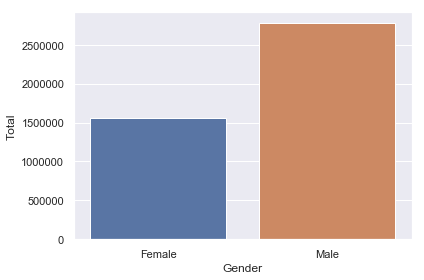

In [15]:
#plotting the rates of suicides among gender
sns.barplot(x="Gender",y="Total",data=filter_gender)
plt.tight_layout()
plt.show()

In [16]:

s_gender=df[['Year','Total','Gender']]
s_gender.tail(10)

,Year,Total,Gender
237498,2011,139,Male
237499,2011,84,Female
237500,2011,14,Male
237501,2011,528,Male
237502,2011,195,Male
237503,2011,61,Female
237504,2011,245,Male
237505,2011,1,Male
237506,2011,6,Female
237510,2012,1,Male


In [17]:
#Grouping data with respect to Year, Gender, total
filter_sgender=pd.DataFrame(s_gender.groupby(['Year','Gender'])['Total'].sum().reset_index())
filter_sgender

,Year,Gender,Total
0,2001,Female,126493
1,2001,Male,198935
2,2002,Female,123165
3,2002,Male,207981
4,2003,Female,121877
5,2003,Male,210639
6,2004,Female,123021
7,2004,Male,217934
8,2005,Female,122992
9,2005,Male,218725


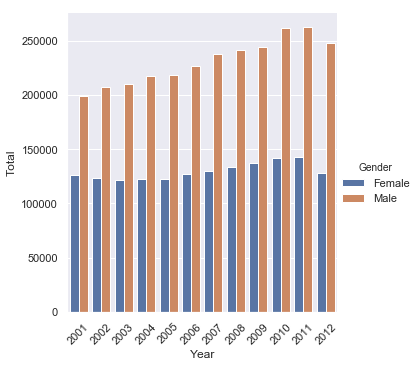

In [18]:
a=sns.catplot(x="Year",y="Total",hue="Gender",kind="bar",data=filter_sgender)
a.set_xticklabels(rotation=45)
plt.show()

######  Males appear to be more vulnerable for suicide -- Reasons to be analyzed
Considering the data where cause of death is specified as separate set for analysis.


In [19]:
r_set=df[df["Type_code"]=="Causes"]
r_set["Type"].value_counts()

Causes Not known                                  3332
Other Causes (Please Specity)                     3065
Family Problems                                   3013
Other Prolonged Illness                           2680
Insanity/Mental Illness                           2572
Love Affairs                                      1697
Poverty                                           1568
Death of Dear Person                              1511
Fall in Social Reputation                         1496
Suspected/Illicit Relation                        1420
Drug Abuse/Addiction                              1406
Unemployment                                      1404
Property Dispute                                  1393
Failure in Examination                            1379
Bankruptcy or Sudden change in Economic           1373
Cancer                                            1233
Professional/Career Problem                       1160
Cancellation/Non-Settlement of Marriage           1116
Paralysis 

Some reasons seem to be repetitive need to unify the reasons to one cause

correct them

In [20]:

#correct them
pd.options.mode.chained_assignment = None
r_set.loc[r_set['Type']=='Bankruptcy or Sudden change in Economic Status', 'Type'] = 'Bankruptcy'
r_set.loc[r_set['Type']=='Bankruptcy or Sudden change in Economic', 'Type'] = 'Bankruptcy'
r_set.loc[r_set['Type']=='Causes Not known', 'Type'] = 'Unknown'
r_set.loc[r_set['Type']=='Other Causes (Please Specity)', 'Type'] = 'Unknown'
r_set.loc[r_set['Type']=='Not having Children(Barrenness/Impotency', 'Type'] = 'Infertility'
r_set.loc[r_set['Type']=='Not having Children (Barrenness/Impotency', 'Type'] = 'Infertility'

In [21]:
r_set["Type"].value_counts()



Unknown                                    6397
Family Problems                            3013
Other Prolonged Illness                    2680
Insanity/Mental Illness                    2572
Love Affairs                               1697
Poverty                                    1568
Death of Dear Person                       1511
Bankruptcy                                 1499
Fall in Social Reputation                  1496
Suspected/Illicit Relation                 1420
Drug Abuse/Addiction                       1406
Unemployment                               1404
Property Dispute                           1393
Failure in Examination                     1379
Cancer                                     1233
Professional/Career Problem                1160
Infertility                                1131
Cancellation/Non-Settlement of Marriage    1116
Paralysis                                  1105
Illness (Aids/STD)                         1011
Dowry Dispute                           

###### Reasons and Suicides



In [22]:
filter_r_setm =pd.DataFrame(r_set.groupby(["Type","Gender"])["Total"].sum()).reset_index()
filter_r_setm =filter_r_setm [filter_r_setm ['Gender']=="Male"]

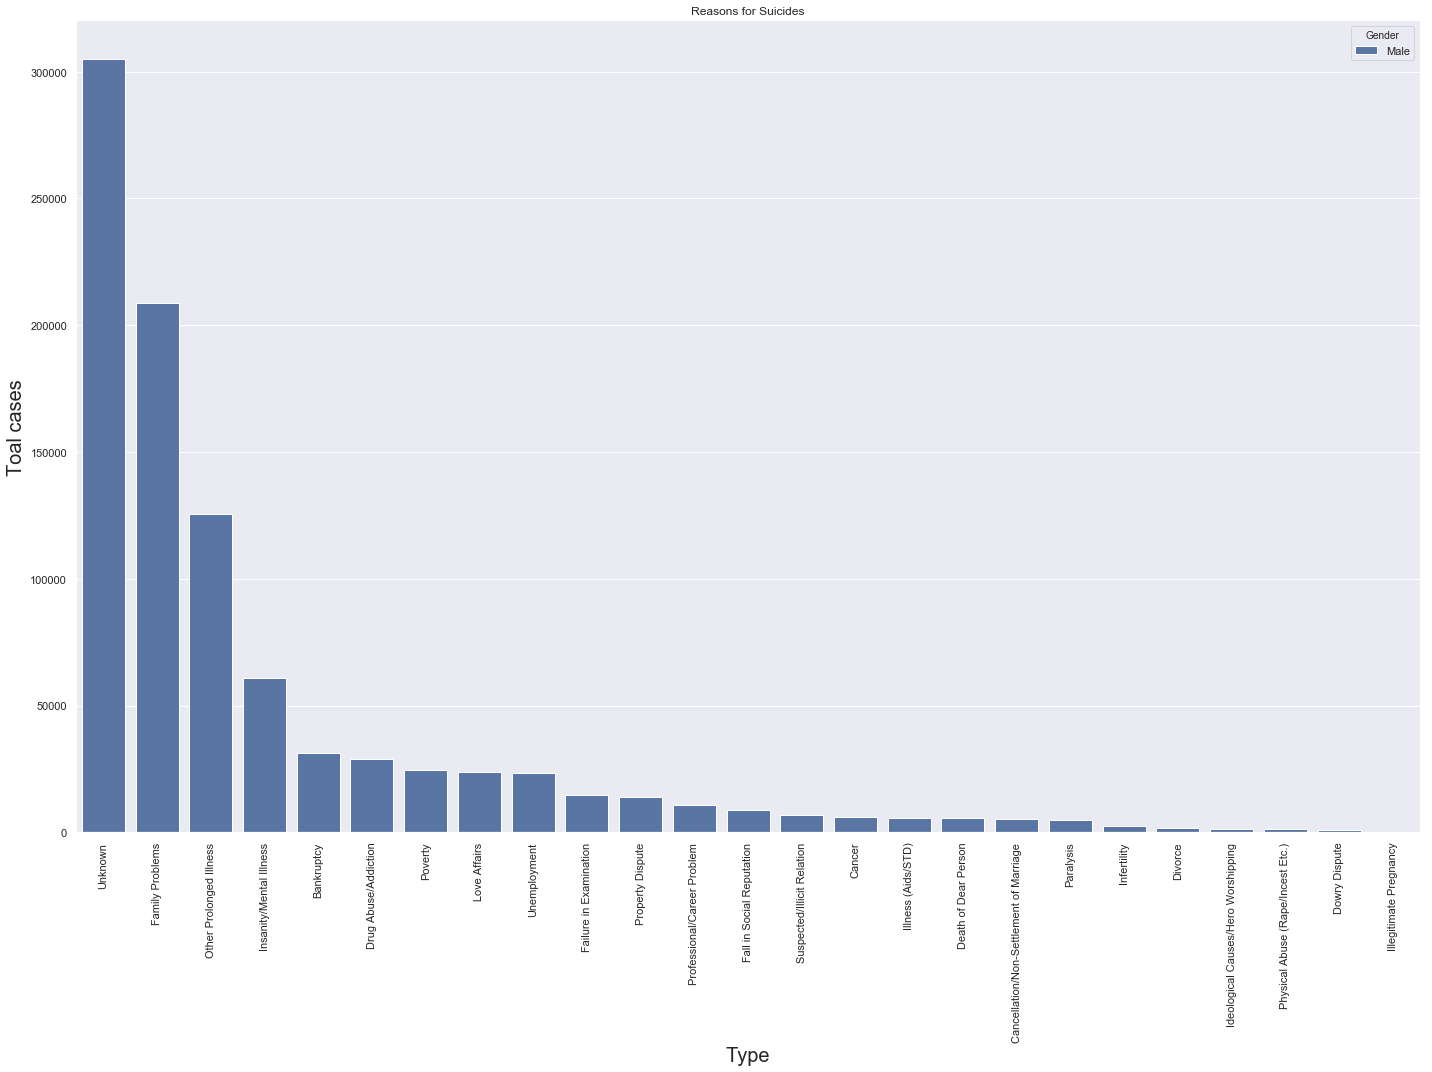

In [23]:
#plotting major reaons for male suicide case
plt.figure(figsize= (20,15))
sns.barplot(x="Type",y="Total",data=filter_r_setm, hue="Gender",edgecolor = 'w',order=filter_r_setm.sort_values('Total',ascending=False).Type)
plt.title('Reasons for Suicides')  
plt.xlabel("Type", fontsize=20)
plt.ylabel("Toal cases",fontsize=20)
plt.xticks(rotation =90)
plt.tight_layout()
plt.show()

In [24]:
filter_r_setm =pd.DataFrame(r_set.groupby(["Type","Gender"])["Total"].sum()).reset_index()
filter_r_setm =filter_r_setm [filter_r_setm ['Gender']=="Female"]

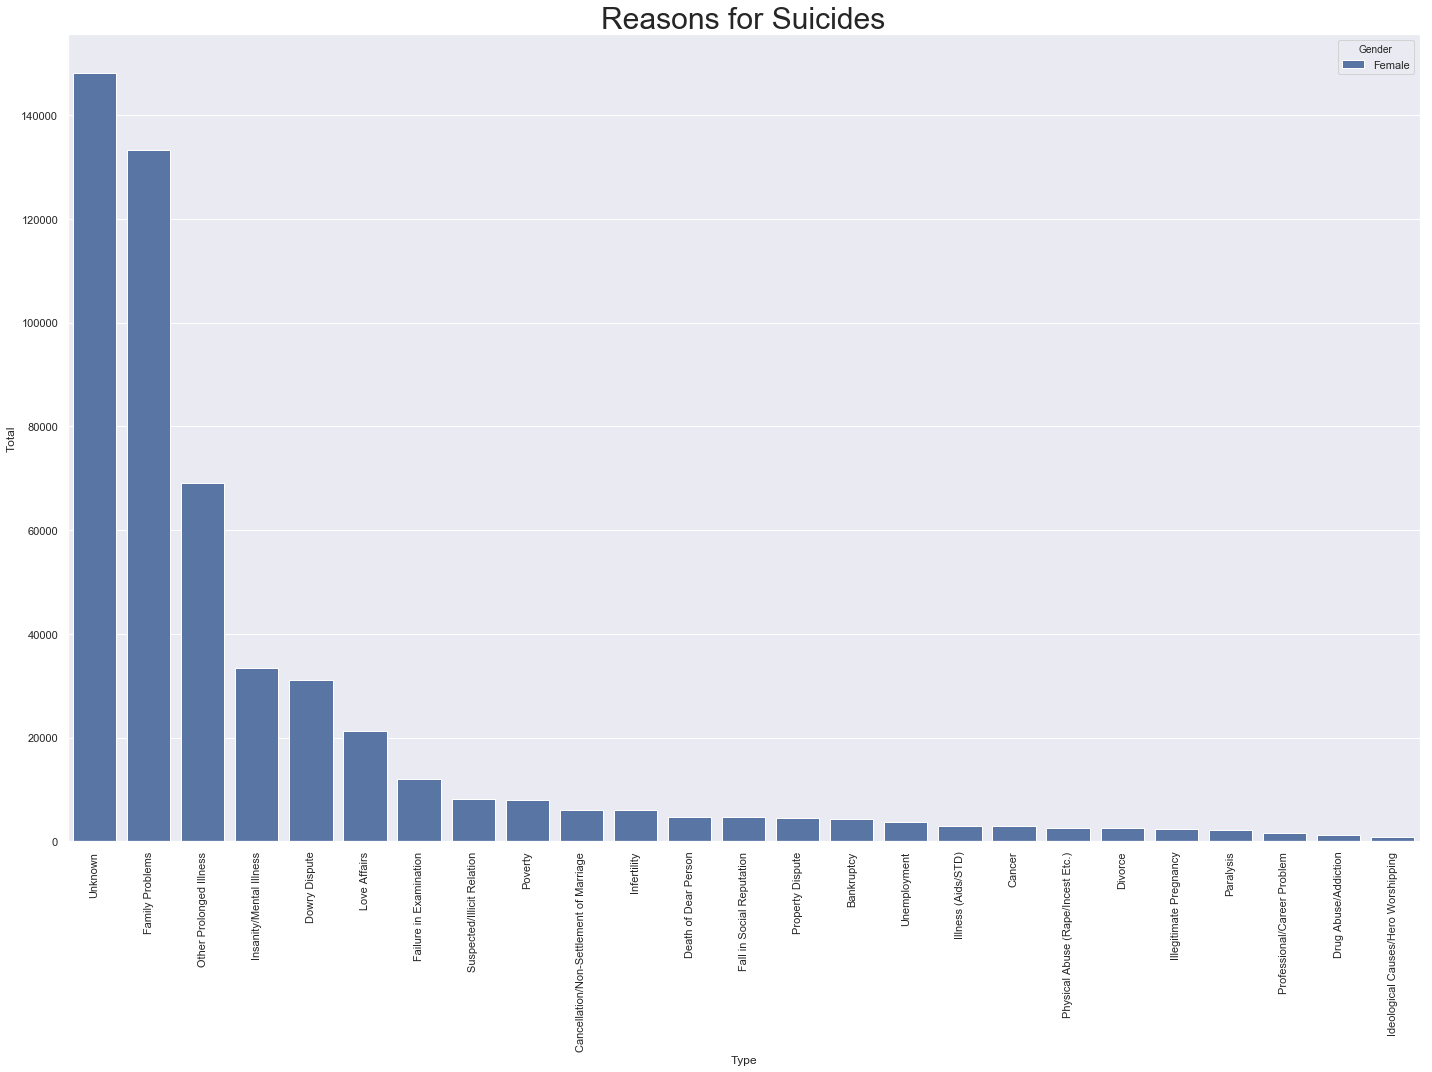

In [25]:
plt.figure(figsize= (20,15))
sns.barplot(x="Type",y="Total",data=filter_r_setm, hue="Gender",edgecolor = 'w',order=filter_r_setm.sort_values('Total',ascending=False).Type)
plt.title('Reasons for Suicides', fontsize=30)    
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

 Men seem to be more vulnerable to commit suicide.
"Family problems" is the major reason for all the suicides irrespective of the gender
Dowry Dispute is second highest reason for women to commit suicide.
Dowry Dispute , Infertility , Physical abuse are the reasons where Women suicide rate is more than men.
Love affairs is the reason where suicide rate is alomost same in Men and Women.


#### Data Wrangling
Replacing all age-range values with 0-4 respectively

In [27]:
#Replacing age group values for easy understanding
r_set['Age_group']=df['Age_group'].replace('0-14',0)
r_set['Age_group']=df['Age_group'].replace('15-29',1)
r_set['Age_group']=df['Age_group'].replace('30-44',2)
r_set['Age_group']=df['Age_group'].replace('45-59',3)
r_set['Age_group']=df['Age_group'].replace('60+',4)

#for main dataframe
df['Age_group']=df['Age_group'].replace('0-14',0)
df['Age_group']=df['Age_group'].replace('15-29',1)
df['Age_group']=df['Age_group'].replace('30-44',2)
df['Age_group']=df['Age_group'].replace('45-59',3)
df['Age_group']=df['Age_group'].replace('60+',4)

C:\Users\Krina\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1440x1080 with 0 Axes>

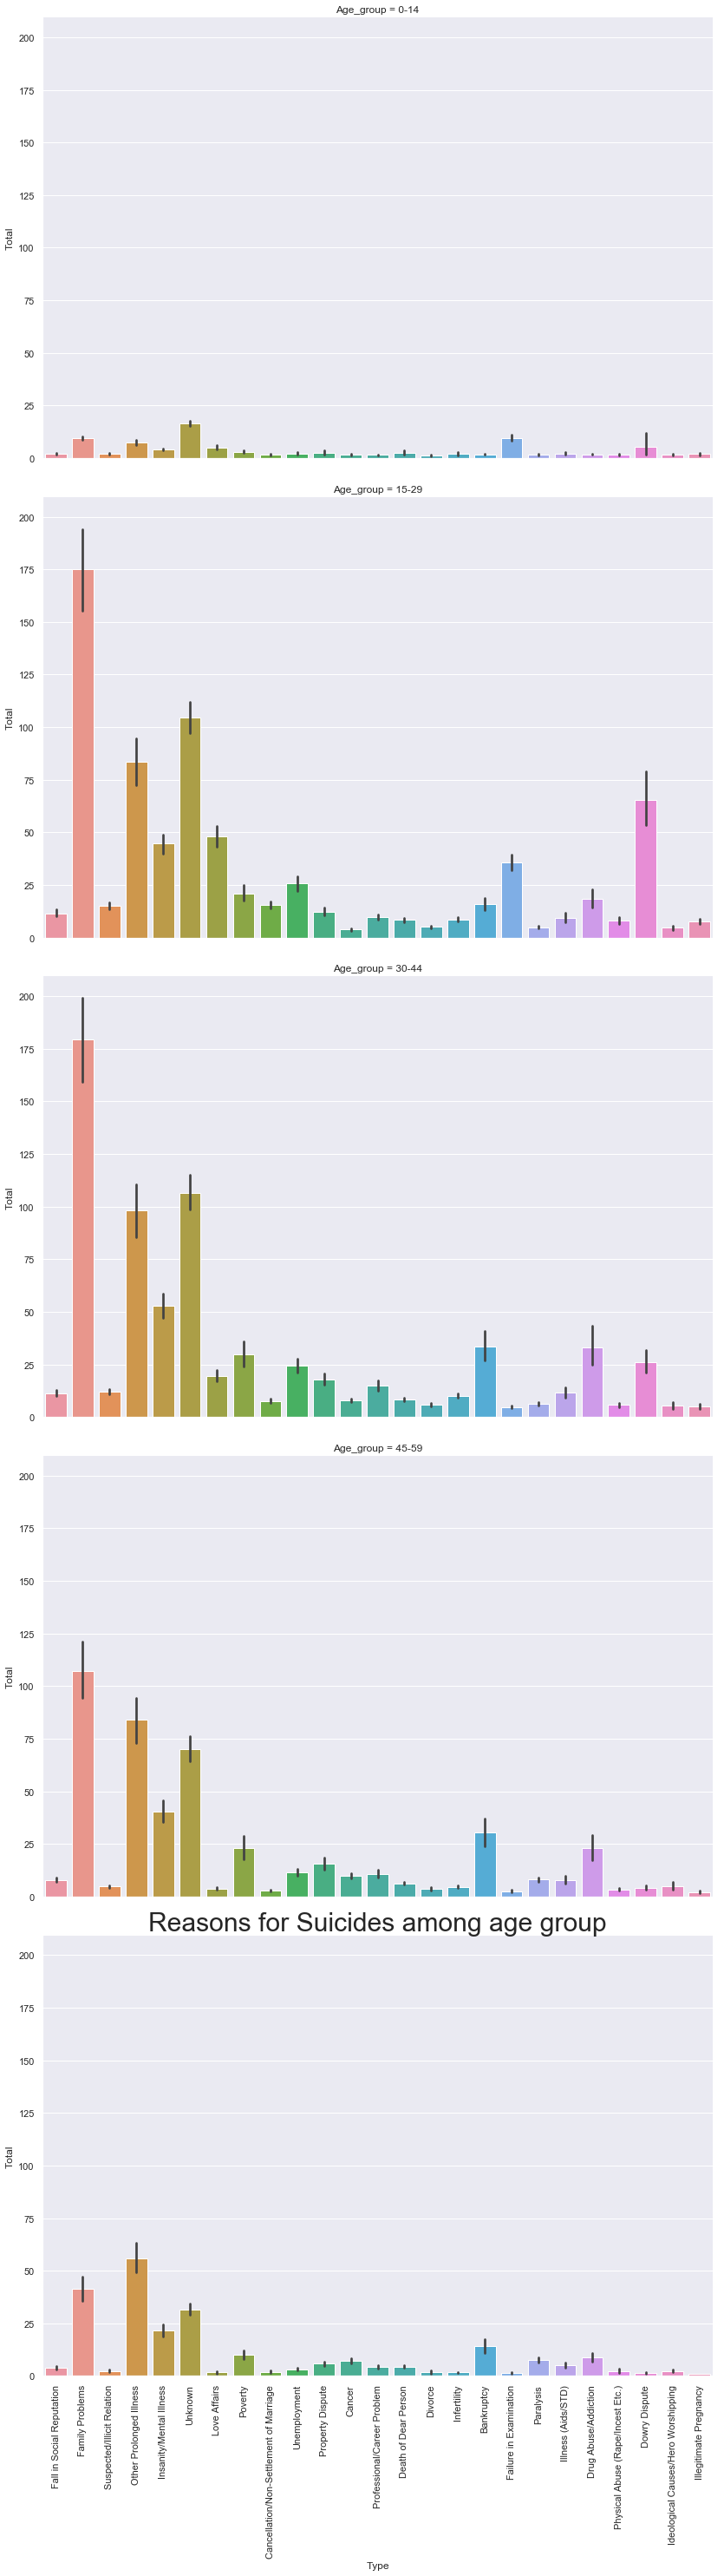

In [28]:
#plotting causes across each age group
plt.figure(figsize= (20,15))
sns.catplot(x="Type", y="Total", kind="bar", row="Age_group",data=r_set,height=8.27, aspect=11.7/8.27);
plt.title('Reasons for Suicides among age group', fontsize=30)    
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

##### From top 10 Reasons of each age group the following observation were drawn

###### Age group 0-14, 15-29 Love affairs is one of the top ten reasons- this dignifies young generation
###### Age group 0-14 --Failure in Examination is the second Strong reason.
###### Family Problems is the strongest reason in all the age groups.
###### Prolonged illness is the strongest reason for age group Age 60+ -- This is some what anticipated
###### Ingeneral illness is appearing as the strongest reason irrespective of age group and gender
###### Unknown reasons are highest -- Data collection is not effective enough.

In [30]:

filter_state=pd.DataFrame(df.groupby('State')['Total'].sum().reset_index())
filter_state

,State,Total
0,A & N ISLANDS,4863
1,ANDHRA PRADESH,488419
2,ARUNACHAL PRADESH,3977
3,ASSAM,103338
4,BIHAR,27724
5,CHANDIGARH,3096
6,CHHATTISGARH,181364
7,D & N HAVELI,2058
8,DAMAN & DIU,833
9,DELHI (UT),50558


In [31]:
filter_state=pd.DataFrame(df.groupby('State')['Total'].sum().reset_index())
filter_state


,State,Total
0,A & N ISLANDS,4863
1,ANDHRA PRADESH,488419
2,ARUNACHAL PRADESH,3977
3,ASSAM,103338
4,BIHAR,27724
5,CHANDIGARH,3096
6,CHHATTISGARH,181364
7,D & N HAVELI,2058
8,DAMAN & DIU,833
9,DELHI (UT),50558


 Plotting cases state-wise

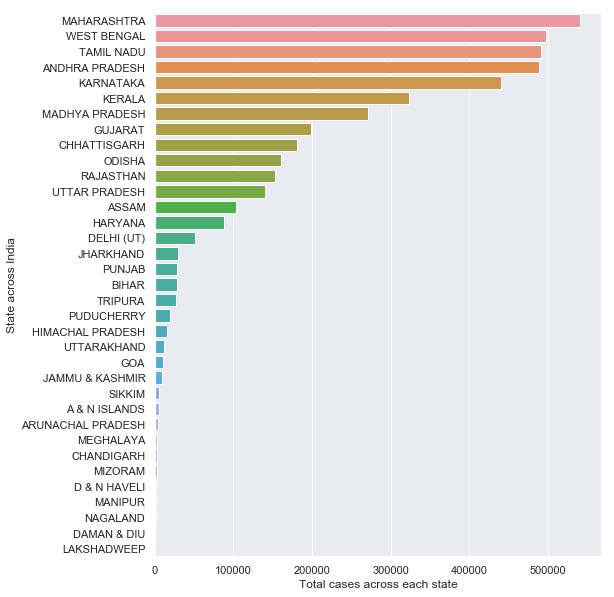

In [32]:
plt.figure(figsize=(8, 10))
sns.barplot(x="Total",y="State",data=filter_state,edgecolor = 'w',order=filter_state.sort_values('Total',ascending=False).State)
plt.xlabel("Total cases across each state")
plt.ylabel("State across India")

plt.show()

###### The above cell shows the most number of suicide counts in states,arranged in highest to lowest.We can observe that states such as Maharashtra, Karnataka, West Bengal, Andhra Pradesh,Karnataka,Tamil Nadu counts signifying an alarming rate.

Means adopted by people, causes and their professional profile career past decade

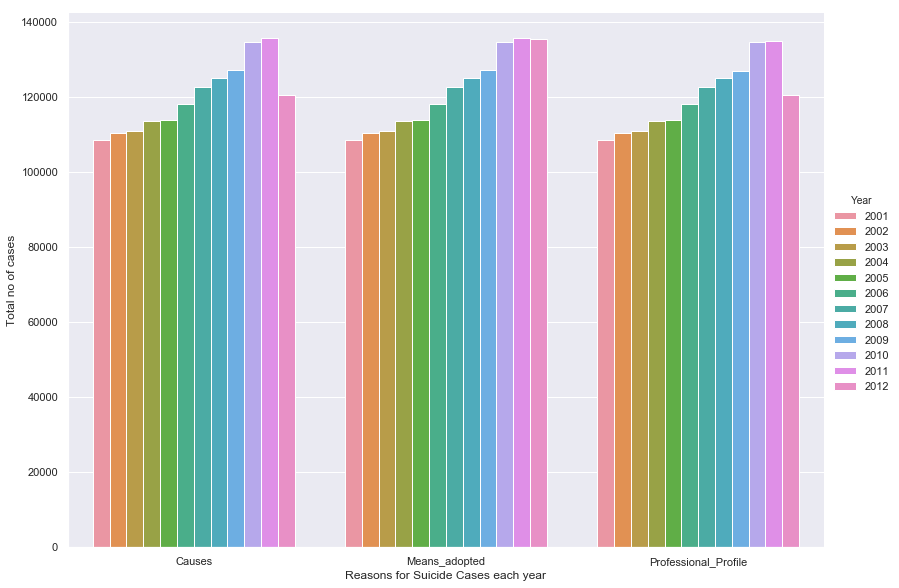

In [33]:

filter_type_code = pd.DataFrame(df.groupby(["Type_code","Year"])["Total"].sum()).reset_index()

sns.catplot(x="Type_code", y="Total",hue="Year", kind="bar", data=filter_type_code,height=8.27, aspect=11.7/8.27)

plt.xlabel("Reasons for Suicide Cases each year")
plt.ylabel("Total no of cases")
plt.show()

In [60]:
#considering only professional profile
p_set=df[df["Type_code"]=="Professional_Profile"]

p_set["Type"].value_counts()

Others (Please Specify)              5509
Unemployed                           2424
Farming/Agriculture Activity         2310
Service (Private)                    2230
Student                              1854
Self-employed (Business activity)    1793
Service (Government)                 1771
House Wife                           1543
Professional Activity                1513
Public Sector Undertaking            1506
Retired Person                        838
Name: Type, dtype: int64

In [35]:
# considering only means adopted by people
m_set=df[df["Type_code"]=="Means_adopted"]
m_set["Type"].value_counts()

By Hanging                                 3514
By Consuming Other Poison                  2952
By Drowning                                2609
By Consuming Insecticides                  2608
By Fire/Self Immolation                    2582
By Other means (please specify)            2415
By coming under running vehicles/trains    1782
By touching electric wires                 1483
By Jumping from (Other sites)              1384
By Jumping from (Building)                 1325
By Overdose of sleeping pills              1272
By Fire-Arms                               1236
By Over Alcoholism                         1228
By Jumping off Moving Vehicles/Trains      1137
By Self Infliction of injury               1093
By Machine                                  504
By Other means                              213
Name: Type, dtype: int64

#### Considering top 5 states for futuer analyis  with respect to their profession, means adopted and age group 

<Figure size 1440x1080 with 0 Axes>

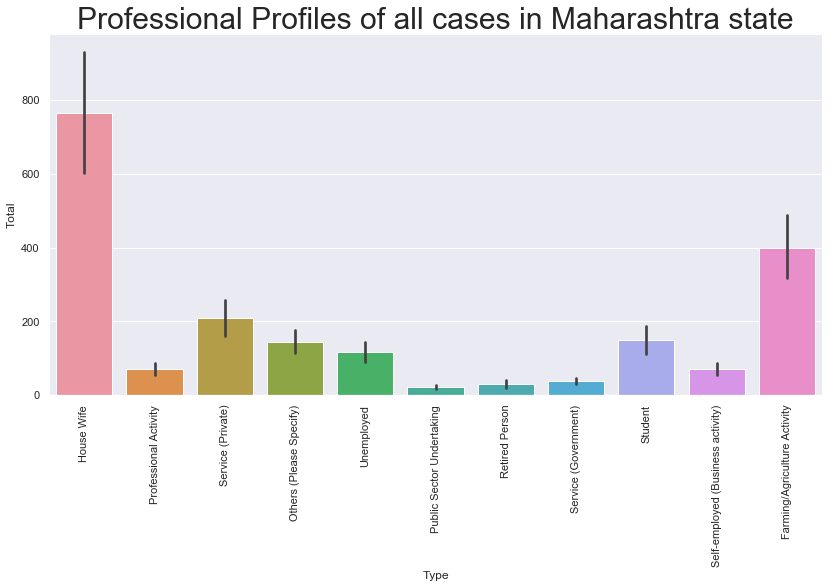

In [36]:
s1=df[df["State"]=="MAHARASHTRA"] 
s1=s1[s1["Type_code"]=="Professional_Profile"]


plt.figure(figsize= (20,15))
sns.catplot(x="Type", y="Total", kind="bar",data=s1,height=8.27, aspect=11.7/8.27);
plt.title('Professional Profiles of all cases in Maharashtra state', fontsize=30)    
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

<Figure size 1440x1080 with 0 Axes>

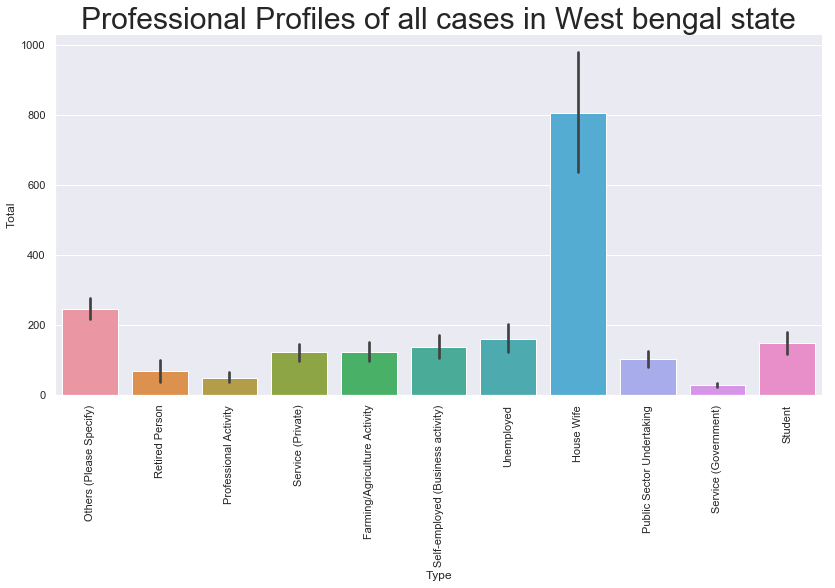

In [37]:
s2=df[df["State"]=="WEST BENGAL"]
s2=s2[s2["Type_code"]=="Professional_Profile"]


plt.figure(figsize= (20,15))
sns.catplot(x="Type", y="Total", kind="bar",data=s2,height=8.27, aspect=11.7/8.27);
plt.title('Professional Profiles of all cases in West bengal state', fontsize=30)    
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

<Figure size 1440x1080 with 0 Axes>

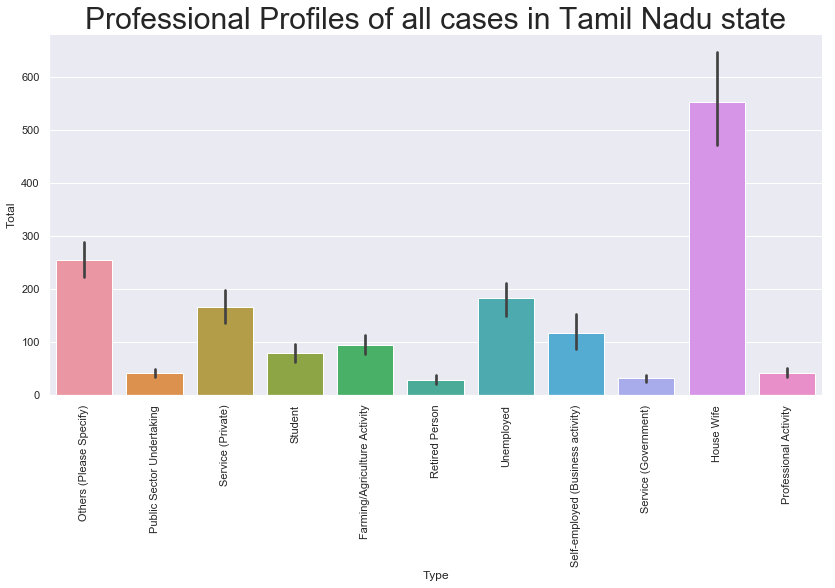

In [38]:
s3=df[df["State"]=="TAMIL NADU"]
s3=s3[s3["Type_code"]=="Professional_Profile"]


plt.figure(figsize= (20,15))
sns.catplot(x="Type", y="Total", kind="bar",data=s3,height=8.27, aspect=11.7/8.27);
plt.title('Professional Profiles of all cases in Tamil Nadu state', fontsize=30)    
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

<Figure size 1440x1080 with 0 Axes>

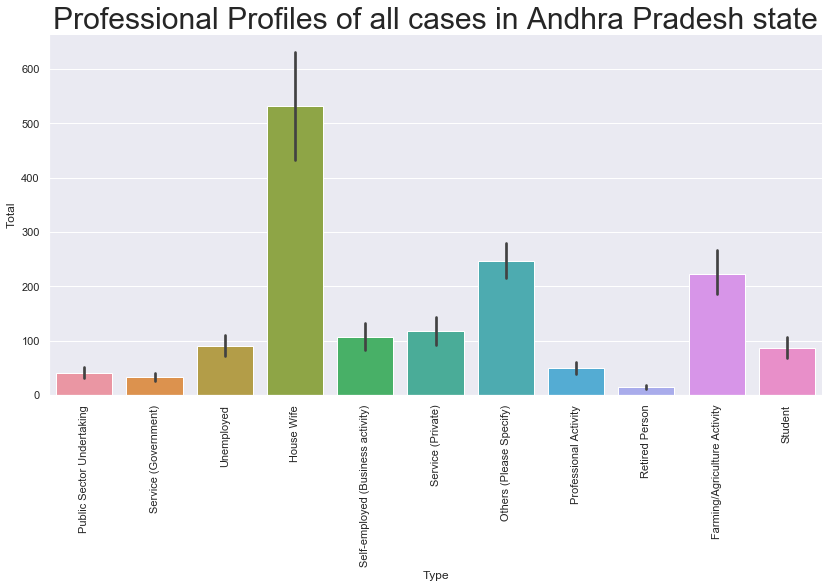

In [39]:
s4=df[df["State"]=="ANDHRA PRADESH"]
s4=s4[s4["Type_code"]=="Professional_Profile"]


plt.figure(figsize= (20,15))
sns.catplot(x="Type", y="Total", kind="bar",data=s4,height=8.27, aspect=11.7/8.27);
plt.title('Professional Profiles of all cases in Andhra Pradesh state', fontsize=30)    
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

<Figure size 1440x1080 with 0 Axes>

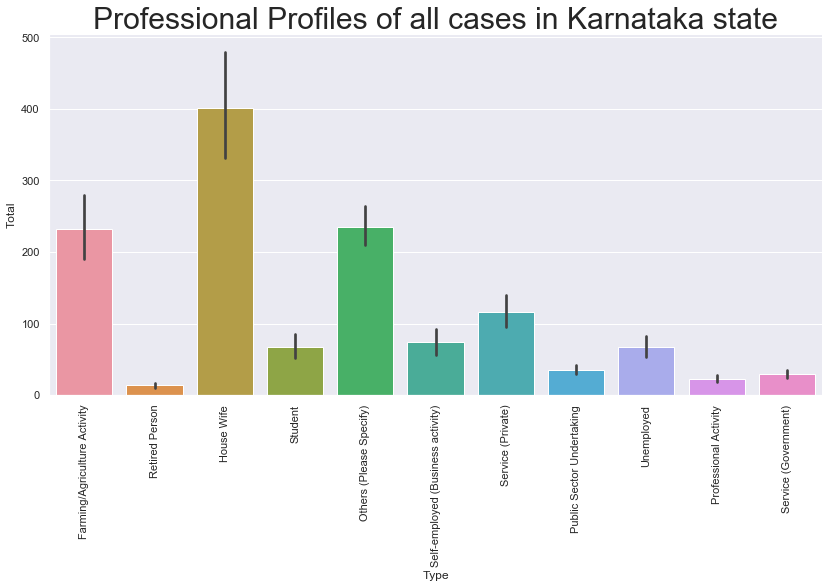

In [40]:
s5=df[df["State"]=="KARNATAKA"]
s5=s5[s5["Type_code"]=="Professional_Profile"]


plt.figure(figsize= (20,15))
sns.catplot(x="Type", y="Total", kind="bar",data=s5,height=8.27, aspect=11.7/8.27);
plt.title('Professional Profiles of all cases in Karnataka state', fontsize=30)    
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

##### Observations:
1. According to the data, most of the females who have committed suicides are house wives among 5 states.
2. In Maharashtra and Karnataka , the second profession leading is agriculture. It is disheartening to see that farmers who     feed the rest of the country are the ones who are more committing suicides than any other profession.
3.  However other profession ranks second among other states stating uncertainity of data.
4.  Followed by farmers, it's the unemployed and private sector employees who are most effected



##### Understanding how different age  group opt for different means for suicides

In [41]:
tp=df['State'].isin(['MAHARASHTRA','WEST BENGAL','TAMIL NADU','ANDHRA PRADESH','KARNATAKA']) 
data_tp=df[tp]
data_tp
data_tp.Type_code.unique()

array(['Causes', 'Means_adopted', 'Professional_Profile'], dtype=object)

In [42]:
filter_m=pd.DataFrame(m_set.groupby(["Type","Gender"])["Total"].sum()).reset_index()



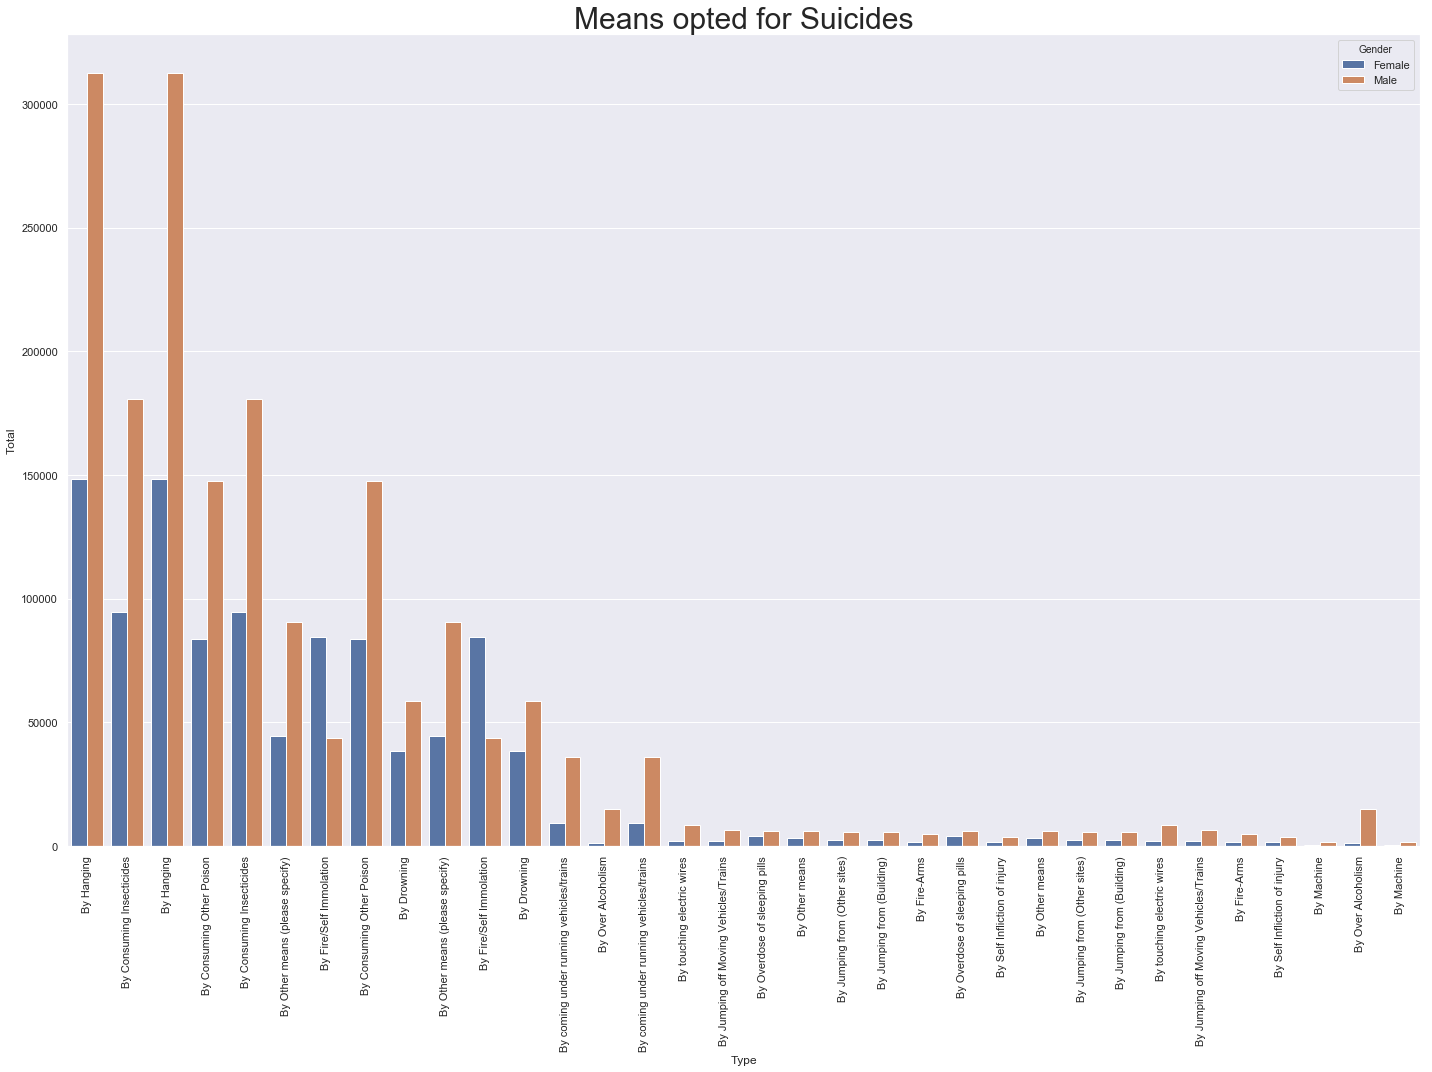

In [43]:
plt.figure(figsize= (20,15))
sns.barplot(x="Type",y="Total",data=filter_m, hue="Gender",edgecolor = 'w',order=filter_m.sort_values('Total',ascending=False).Type)
plt.title('Means opted for Suicides', fontsize=30)    
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [44]:
m1=df[df["Age_group"]==0]

m1=m1[m1["Type_code"]=="Means_adopted"]
filter_m1=pd.DataFrame(m1.groupby(["Type","Gender"])["Total"].sum()).reset_index()


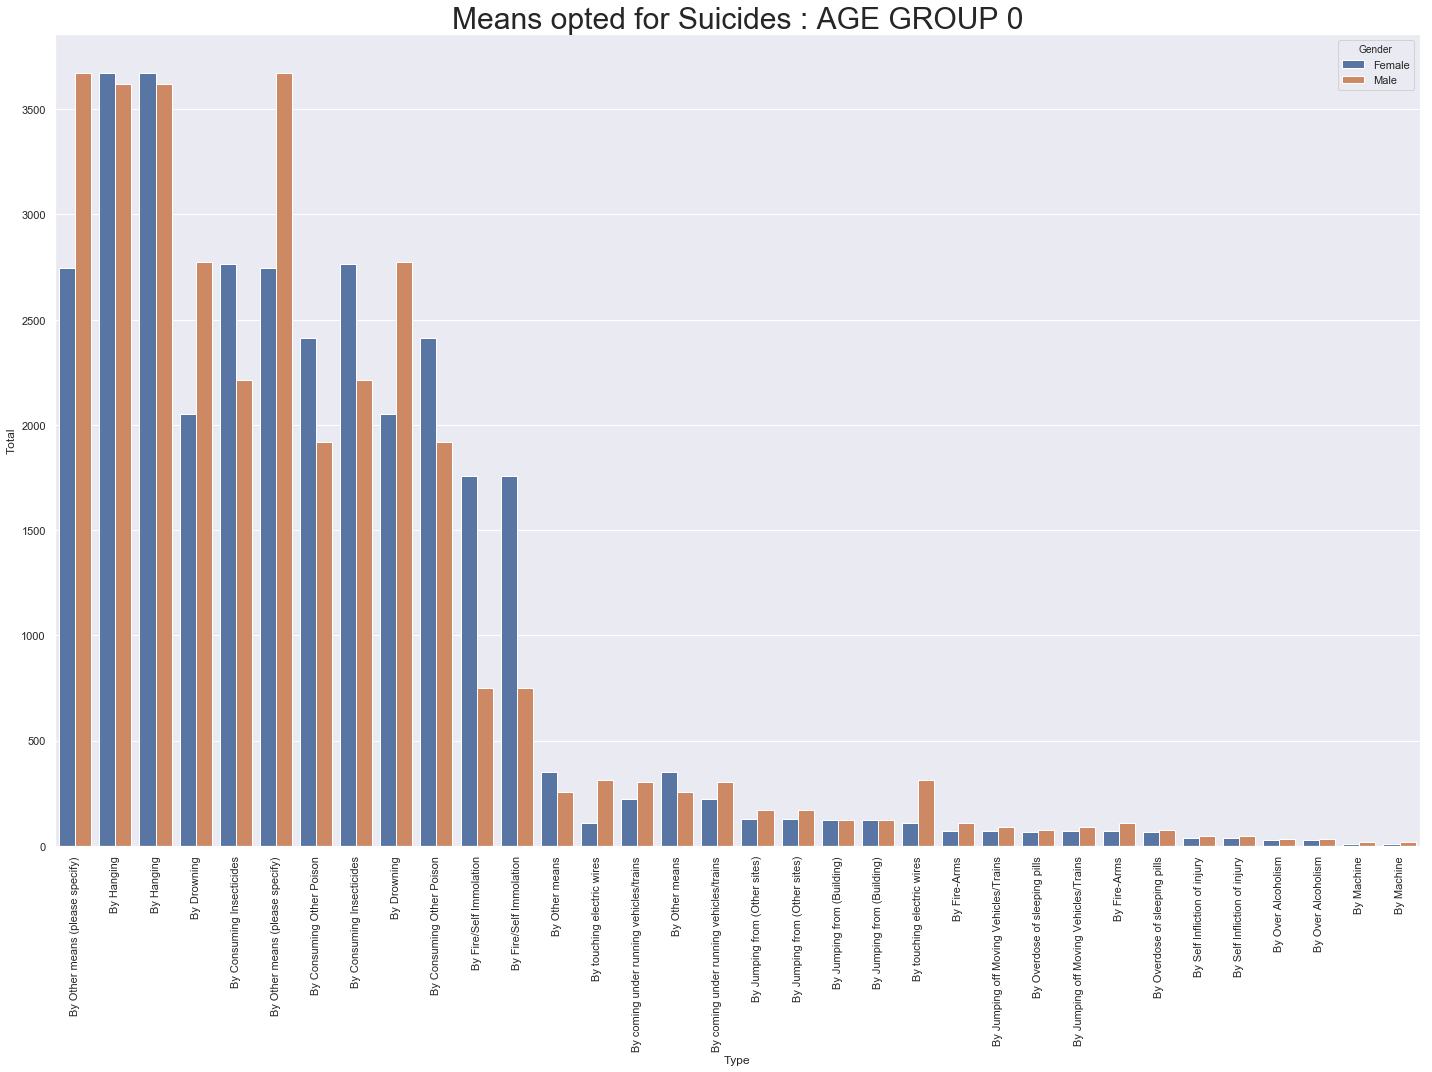

In [46]:
#plotting for all the age groups  with respect  to gender
plt.figure(figsize= (20,15))
sns.barplot(x="Type",y="Total",hue="Gender", data=filter_m1,edgecolor = 'w',order=filter_m1.sort_values('Total',ascending=False).Type)
plt.title('Means opted for Suicides : AGE GROUP 0', fontsize=30)    
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


In [47]:
# Age groiup 1
m2=df[df["Age_group"]==1]
m2=m2[m2["Type_code"]=="Means_adopted"]
filter_m2=pd.DataFrame(m2.groupby(["Type","Gender"])["Total"].sum()).reset_index()

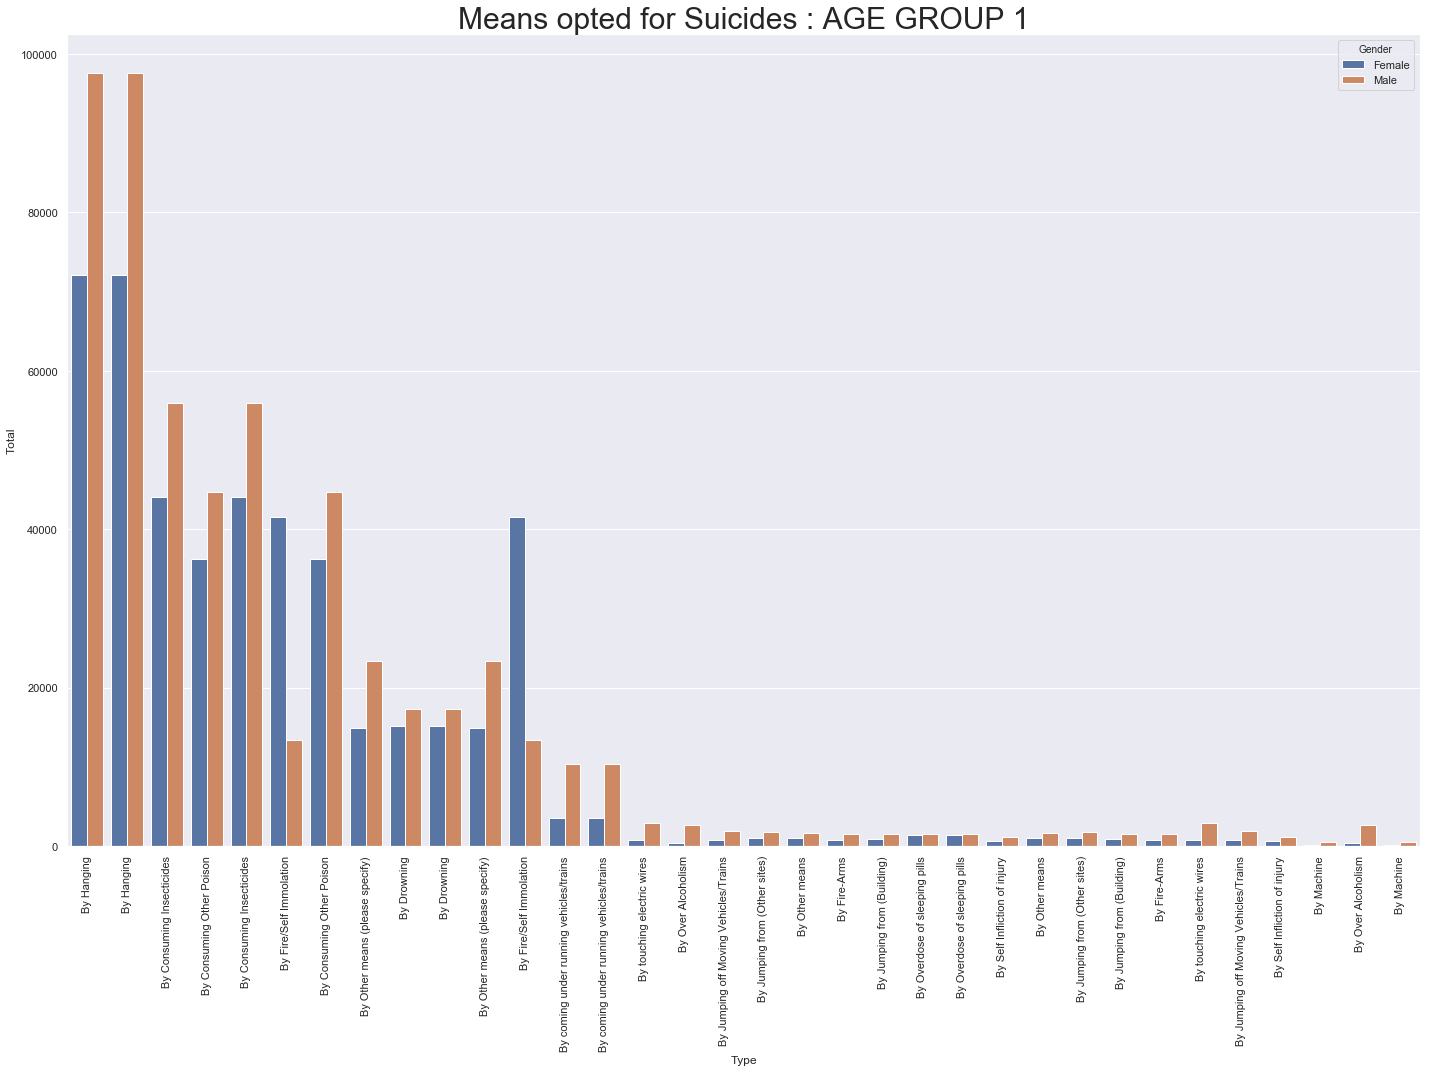

In [48]:
plt.figure(figsize= (20,15))
sns.barplot(x="Type",y="Total",data=filter_m2, hue="Gender",edgecolor = 'w',order=filter_m2.sort_values('Total',ascending=False).Type)
plt.title('Means opted for Suicides : AGE GROUP 1', fontsize=30)    
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


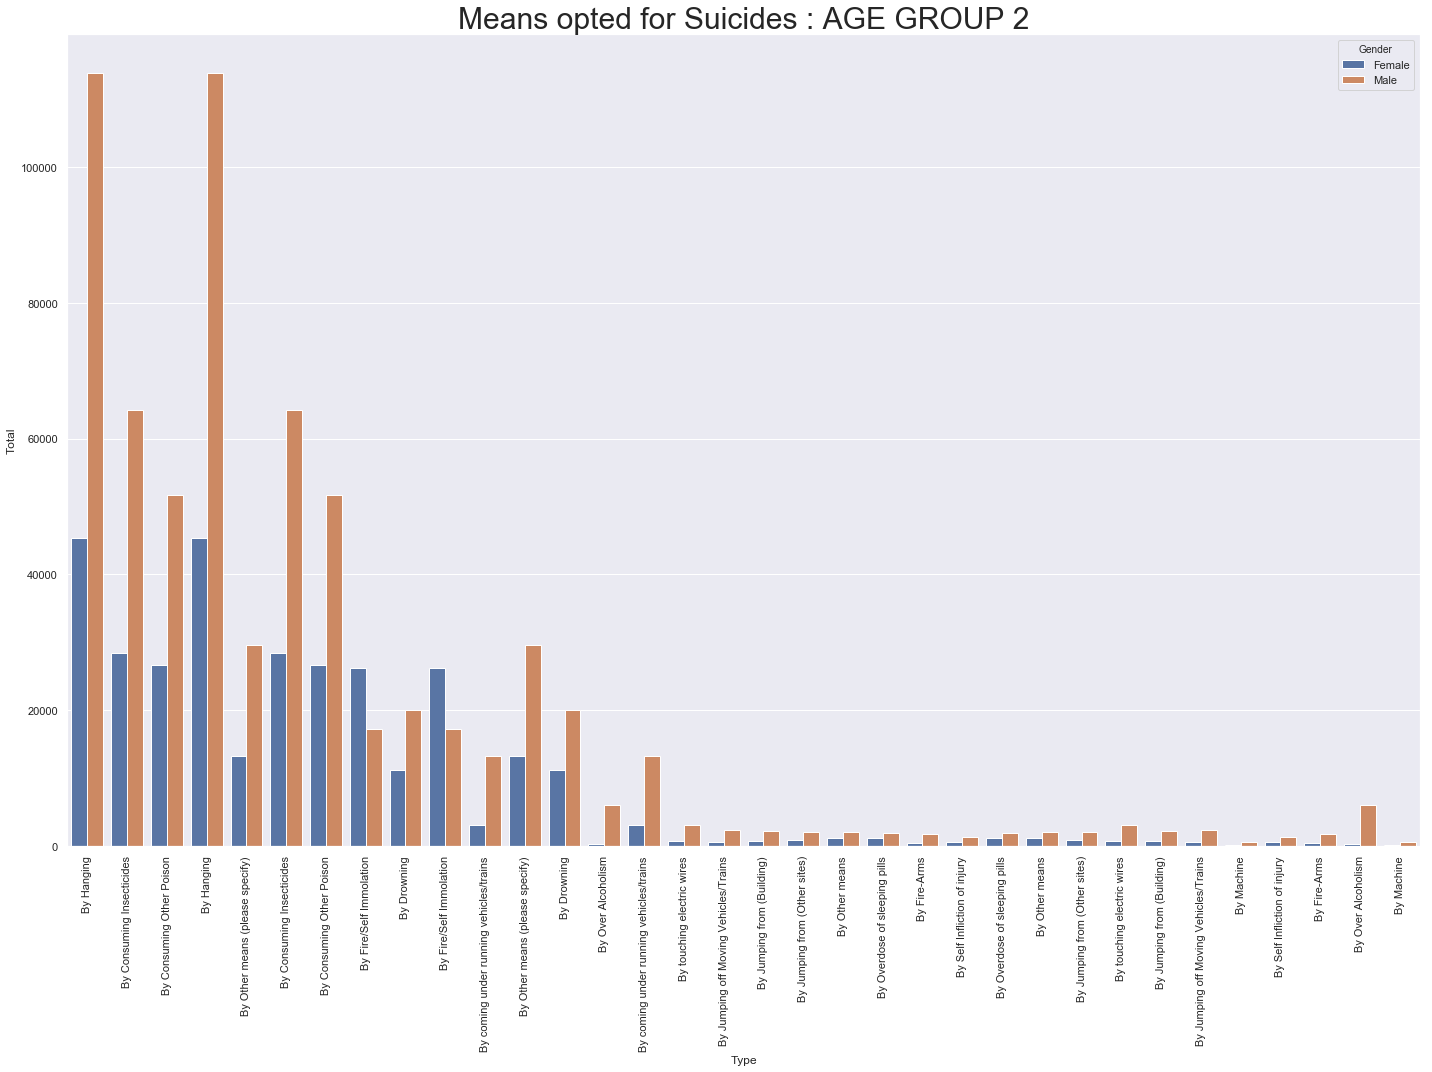

In [49]:
# Age group 2
m3=df[df["Age_group"]==2]
m3=m3[m3["Type_code"]=="Means_adopted"]
filter_m3=pd.DataFrame(m3.groupby(["Type","Gender"])["Total"].sum()).reset_index()

plt.figure(figsize= (20,15))
sns.barplot(x="Type",y="Total",data=filter_m3, hue="Gender",edgecolor = 'w',order=filter_m3.sort_values('Total',ascending=False).Type)
plt.title('Means opted for Suicides : AGE GROUP 2', fontsize=30)    
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


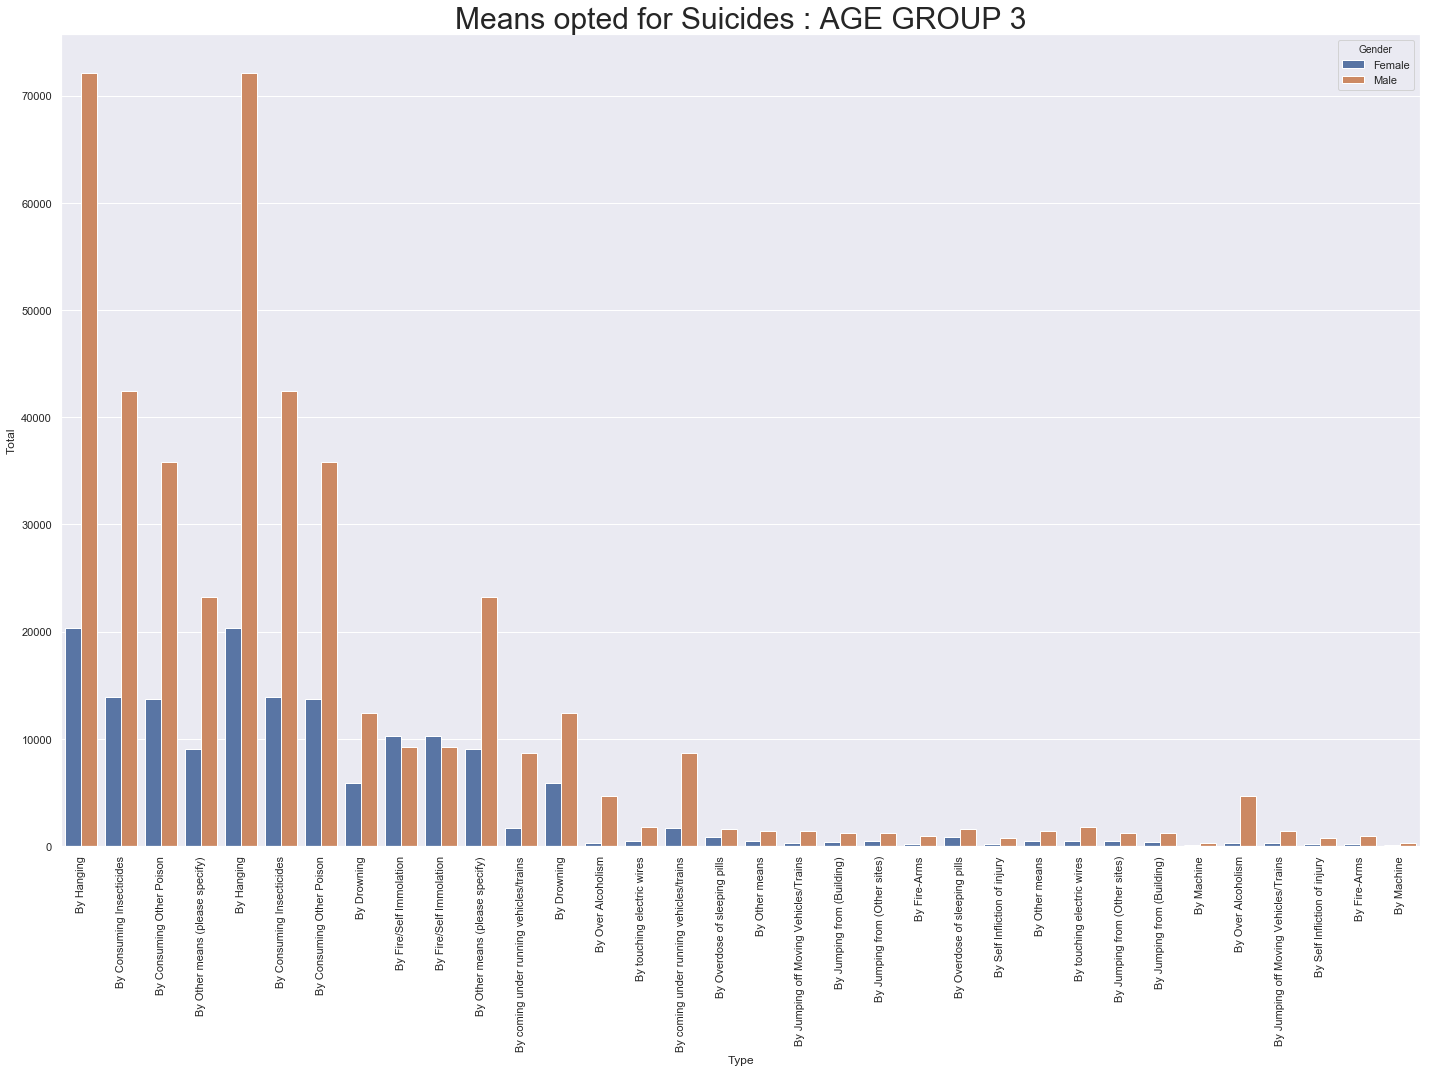

In [50]:
# Age group 3
m4=df[df["Age_group"]==3]
m4=m4[m4["Type_code"]=="Means_adopted"]
filter_m4=pd.DataFrame(m4.groupby(["Type","Gender"])["Total"].sum()).reset_index()

plt.figure(figsize= (20,15))
sns.barplot(x="Type",y="Total",data=filter_m4, hue="Gender",edgecolor = 'w',order=filter_m4.sort_values('Total',ascending=False).Type)
plt.title('Means opted for Suicides : AGE GROUP 3', fontsize=30)    
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

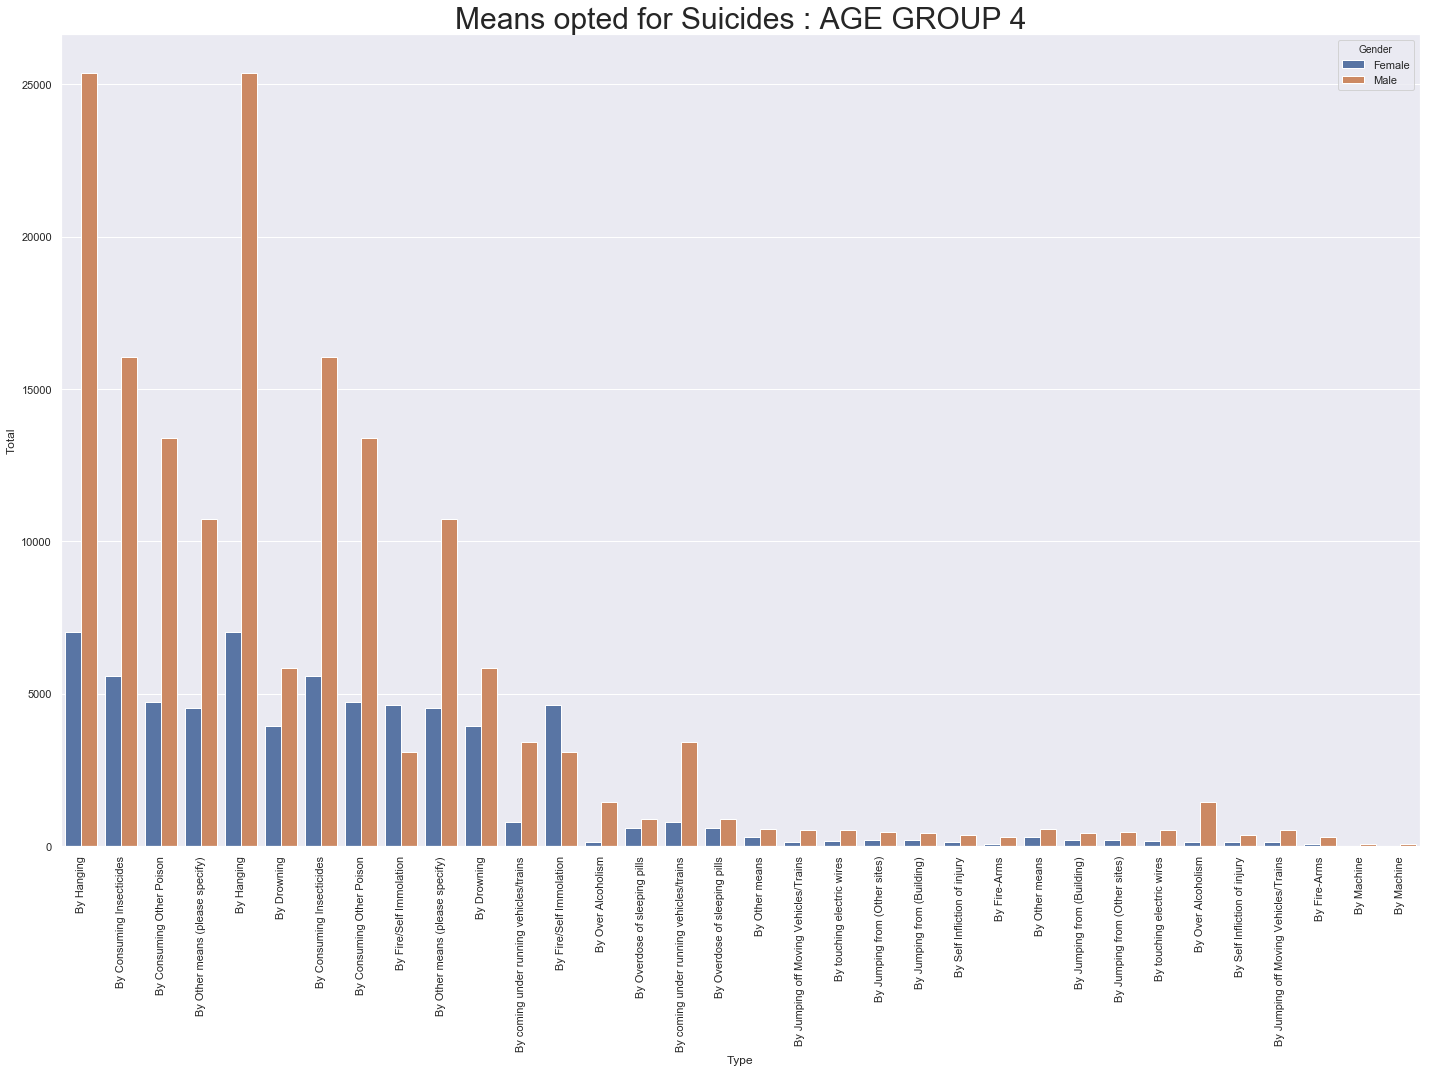

In [51]:
# Age group 4
m5=df[df["Age_group"]==4]
m5=m5[m5["Type_code"]=="Means_adopted"]
filter_m5=pd.DataFrame(m5.groupby(["Type","Gender"])["Total"].sum()).reset_index()

plt.figure(figsize= (20,15))
sns.barplot(x="Type",y="Total",data=filter_m5, hue="Gender",edgecolor = 'w',order=filter_m5.sort_values('Total',ascending=False).Type)
plt.title('Means opted for Suicides : AGE GROUP 4', fontsize=30)    
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### Observatons:
1.  Hanging is one of the most opted mean for all the groups especially males at a count rate almost double than female. Thus, it says it one of the easy means among people.
2.  Drowning and pesticides were in top 3 for age group 0 stating that being underage they opted for simple means
3. According to the data, most of the females who have committed suicides are house wives among 5 states. Rest of the age groups from 1-4 have almost same distribution of their top choices Hanging, Consuming Insecticides and poison.
 4.  However, others was leading among age group 0 which does not protray clarity of dataset